In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("crop_production.csv")

# Basic Insights from Dataframe

In [3]:
df.sample(10)

Unnamed: 0     State_Name   Crop_Type    Crop    N   P   K    pH  \
82290       82290    maharashtra      kharif    rice   80  40  40  5.42   
85328       85328    west bengal      summer    rice   80  40  40  5.68   
85505       85505    west bengal      kharif   maize   80  40  20  5.52   
82752       82752         odisha      kharif    ragi   50  40  20  5.46   
77036       77036  uttar pradesh        rabi  barley   70  40  45  5.36   
36822       36822         odisha      kharif    jute   80  40  40  5.52   
12062       12062          bihar      kharif   maize   80  40  20  5.40   
22452       22452         punjab      kharif  cotton  120  40  20  5.50   
32313       32313          bihar  whole year   onion  120  60  65  6.10   
70312       70312    uttarakhand      kharif    rice   80  40  40  5.62   

       rainfall  temperature  Area_in_hectares  Production_in_tons  \
82290    607.48    26.366667           77400.0            201000.0   
85328    182.50    29.200000           95232.0            271409.0   
85505   1166.94    28.333333            5081.0             18471.0   
82752   1145.22    28.500000            3815.0              3685.3   
77036     75.32    22.676000             482.0               471.0   
36822   1145.22    28.500000               1.0                12.0   
12062    840.46    33.583333            1984.0              5248.0   
22452    411.52    34.730000            8000.0             20000.0   
32313   1026.64    29.186364             488.0              4138.0   
70312   1110.78    25.666667          100822.0            283757.0   

       Yield_ton_per_hec  
82290           2.596899  
85328           2.849977  
85505           3.635308  
82752           0.966003  
77036           0.977178  
36822          12.000000  
12062           2.645161  
22452           2.500000  
32313           8.479508  
70312           2.814435

In [4]:
df.head()

Unnamed: 0      State_Name Crop_Type       Crop    N   P   K    pH  \
0           0  andhra pradesh    kharif     cotton  120  40  20  5.46   
1           1  andhra pradesh    kharif  horsegram   20  60  20  6.18   
2           2  andhra pradesh    kharif      jowar   80  40  40  5.42   
3           3  andhra pradesh    kharif      maize   80  40  20  5.62   
4           4  andhra pradesh    kharif      moong   20  40  20  5.68   

   rainfall  temperature  Area_in_hectares  Production_in_tons  \
0    654.34    29.266667            7300.0              9400.0   
1    654.34    29.266667            3300.0              1000.0   
2    654.34    29.266667           10100.0             10200.0   
3    654.34    29.266667            2800.0              4900.0   
4    654.34    29.266667            1300.0               500.0   

   Yield_ton_per_hec  
0           1.287671  
1           0.303030  
2           1.009901  
3           1.750000  
4           0.384615

In [5]:
df.shape

(99849, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          99849 non-null  int64  
 1   State_Name          99849 non-null  object 
 2   Crop_Type           99849 non-null  object 
 3   Crop                99849 non-null  object 
 4   N                   99849 non-null  int64  
 5   P                   99849 non-null  int64  
 6   K                   99849 non-null  int64  
 7   pH                  99849 non-null  float64
 8   rainfall            99849 non-null  float64
 9   temperature         99849 non-null  float64
 10  Area_in_hectares    99849 non-null  float64
 11  Production_in_tons  99849 non-null  float64
 12  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


In [7]:
df.isnull().mean()*100

Unnamed: 0            0.0
State_Name            0.0
Crop_Type             0.0
Crop                  0.0
N                     0.0
P                     0.0
K                     0.0
pH                    0.0
rainfall              0.0
temperature           0.0
Area_in_hectares      0.0
Production_in_tons    0.0
Yield_ton_per_hec     0.0
dtype: float64

#### Hence there are no missing values

#### We will remove the first, N, K, and P columns as they are not of much use to us

In [8]:
df=df.drop(columns=["Unnamed: 0","N","K","P"])

#### Renaming columns for the sake of convenience

In [9]:
df.rename(columns={'Crop_Type': 'Season', 'State_Name': 'State', 'rainfall': 'Rainfall', 'temperature': 'Temperature', 'Area_in_hectares': 'Area', 'Production_in_tons': 'Production', 'Yield_ton_per_hec': 'Yield'}, inplace=True)

In [10]:
df.sample(10)

State      Season       Crop    pH  Rainfall  Temperature  \
89465         meghalaya      kharif    sesamum  6.60   423.745    22.070000   
58050           haryana      kharif     cotton  5.58   331.880    35.346667   
14160    madhya pradesh      kharif      maize  5.42  1011.490    30.430000   
98937     uttar pradesh      kharif       rice  5.46   579.750    34.010000   
50643  himachal pradesh        rabi      wheat  6.11   240.100    10.380000   
95836            kerala  whole year   turmeric  4.84  2817.860    27.909091   
2078     madhya pradesh        rabi     barley  5.32    73.470    23.562000   
3040          rajasthan        rabi      wheat  6.80    19.380    22.766000   
64592      chhattisgarh  whole year  coriander  6.38  1299.260    26.518182   
5873              bihar  whole year      onion  5.88  1026.640    29.186364   

            Area  Production     Yield  
89465     153.00       78.00  0.509804  
58050    3617.00     7000.00  1.935306  
14160   36833.00    61774.00  1.677137  
98937  130217.00   265252.00  2.037000  
50643   34689.00    71439.00  2.059414  
95836     244.58      347.26  1.419822  
2078     7400.00     7300.00  0.986486  
3040    54500.00   120100.00  2.203670  
64592      11.00        3.00  0.272727  
5873     1324.00    12406.00  9.370091

In [11]:
df.shape

(99849, 9)

In [12]:
df.describe(include="all")

State  Season   Crop            pH      Rainfall  \
count           99849   99849  99849  99849.000000  99849.000000   
unique             33       4     53           NaN           NaN   
top     uttar pradesh  kharif   rice           NaN           NaN   
freq            12598   38758  11430           NaN           NaN   
mean              NaN     NaN    NaN      5.643624    701.151085   
std               NaN     NaN    NaN      0.505283    604.701552   
min               NaN     NaN    NaN      3.820000      3.274569   
25%               NaN     NaN    NaN      5.360000    157.310000   
50%               NaN     NaN    NaN      5.540000    579.750000   
75%               NaN     NaN    NaN      5.960000   1110.780000   
max               NaN     NaN    NaN      7.000000   3322.060000   

         Temperature           Area    Production         Yield  
count   99849.000000   99849.000000  9.984900e+04  99849.000000  
unique           NaN            NaN           NaN           NaN  
top              NaN            NaN           NaN           NaN  
freq             NaN            NaN           NaN           NaN  
mean       26.684154   16476.585668  3.776291e+04      3.931149  
std         4.851214   43604.268231  1.222447e+05     33.872242  
min         1.180000       0.580000  0.000000e+00      0.000000  
25%        23.106000     130.000000  1.620000e+02      0.586207  
50%        27.333333    1010.000000  1.506000e+03      1.329268  
75%        29.266667    8099.000000  1.439500e+04      2.997288  
max        35.346667  726300.000000  3.530571e+06   9801.000000

In [13]:
df.duplicated().sum()

np.int64(0)

# Visualization and Dealing with of Categorical Data

33

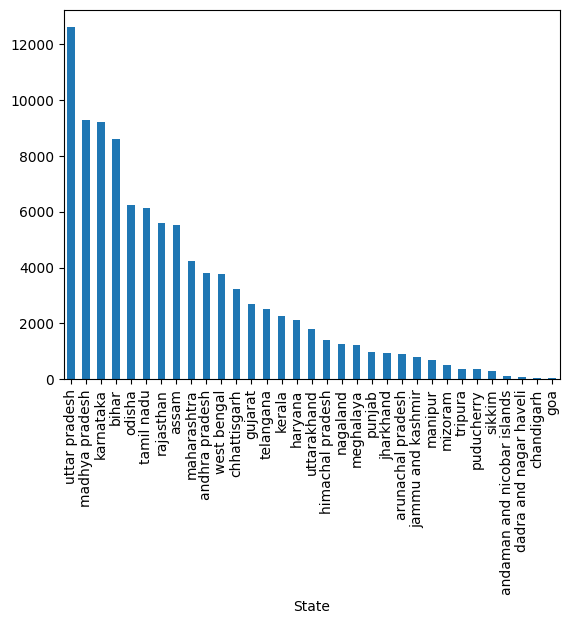

In [14]:
df['State'].value_counts().plot(kind="bar")
df['State'].nunique()

In [15]:
unique_states = sorted(df['State'].unique())
print("Unique categories of 'State' sorted alphabetically:")
print(unique_states)

Unique categories of 'State' sorted alphabetically:
['andaman and nicobar islands', 'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'chandigarh', 'chhattisgarh', 'dadra and nagar haveli', 'goa', 'gujarat', 'haryana', 'himachal pradesh', 'jammu and kashmir', 'jharkhand', 'karnataka', 'kerala', 'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana', 'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal']


4

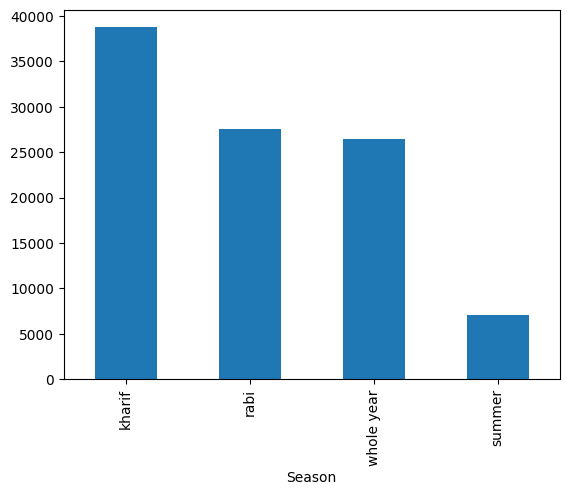

In [16]:
df['Season'].value_counts().plot(kind="bar")
df['Season'].nunique()

53

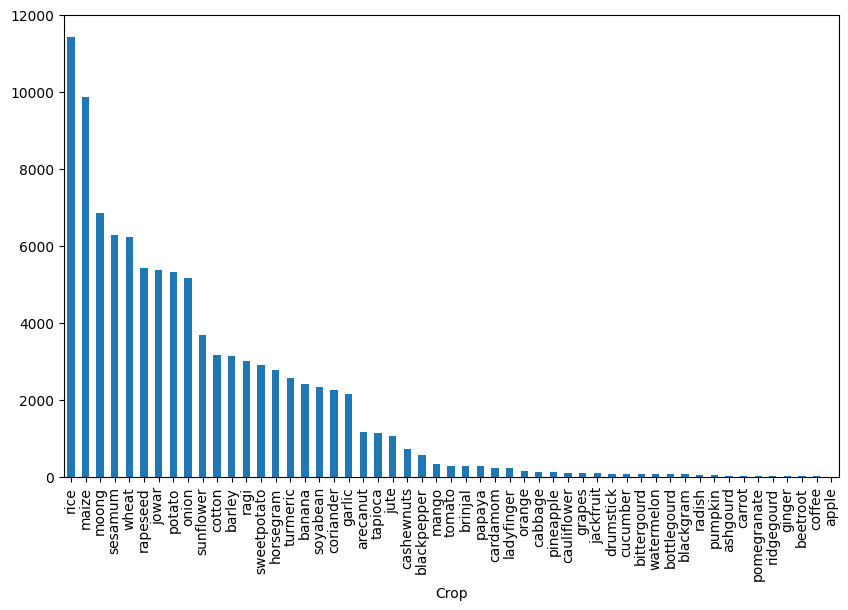

In [17]:
df['Crop'].value_counts().plot(kind="bar",figsize=(10,6))
df['Crop'].nunique()

In [18]:
df['Crop'].value_counts()

Crop
rice           11430
maize           9857
moong           6855
sesamum         6291
wheat           6225
rapeseed        5413
jowar           5369
potato          5324
onion           5164
sunflower       3682
cotton          3157
barley          3139
ragi            2995
sweetpotato     2899
horsegram       2784
turmeric        2562
banana          2409
soyabean        2325
coriander       2253
garlic          2138
arecanut        1154
tapioca         1134
jute            1058
cashewnuts       732
blackpepper      571
mango            330
tomato           284
brinjal          282
papaya           281
cardamom         237
ladyfinger       217
orange           146
cabbage          125
pineapple        117
cauliflower      105
grapes           104
jackfruit         90
drumstick         73
cucumber          72
bittergourd       67
watermelon        59
bottlegourd       58
blackgram         58
radish            45
pumpkin           37
ashgourd          28
carrot            28
pomegran

In [19]:
unique_crops = sorted(df['Crop'].unique())
print("Unique categories of 'Crop' sorted alphabetically:")
print(unique_crops)

Unique categories of 'Crop' sorted alphabetically:
['apple', 'arecanut', 'ashgourd', 'banana', 'barley', 'beetroot', 'bittergourd', 'blackgram', 'blackpepper', 'bottlegourd', 'brinjal', 'cabbage', 'cardamom', 'carrot', 'cashewnuts', 'cauliflower', 'coffee', 'coriander', 'cotton', 'cucumber', 'drumstick', 'garlic', 'ginger', 'grapes', 'horsegram', 'jackfruit', 'jowar', 'jute', 'ladyfinger', 'maize', 'mango', 'moong', 'onion', 'orange', 'papaya', 'pineapple', 'pomegranate', 'potato', 'pumpkin', 'radish', 'ragi', 'rapeseed', 'rice', 'ridgegourd', 'sesamum', 'soyabean', 'sunflower', 'sweetpotato', 'tapioca', 'tomato', 'turmeric', 'watermelon', 'wheat']


#### Deleting data occurances having frequency below 100

In [20]:
threshold = 100
count = df['Crop'].value_counts()
crops_to_keep = count[count >= threshold].index
df = df[df['Crop'].isin(crops_to_keep)]

In [21]:
df['Crop'].value_counts()

Crop
rice           11430
maize           9857
moong           6855
sesamum         6291
wheat           6225
rapeseed        5413
jowar           5369
potato          5324
onion           5164
sunflower       3682
cotton          3157
barley          3139
ragi            2995
sweetpotato     2899
horsegram       2784
turmeric        2562
banana          2409
soyabean        2325
coriander       2253
garlic          2138
arecanut        1154
tapioca         1134
jute            1058
cashewnuts       732
blackpepper      571
mango            330
tomato           284
brinjal          282
papaya           281
cardamom         237
ladyfinger       217
orange           146
cabbage          125
pineapple        117
cauliflower      105
grapes           104
Name: count, dtype: int64

36

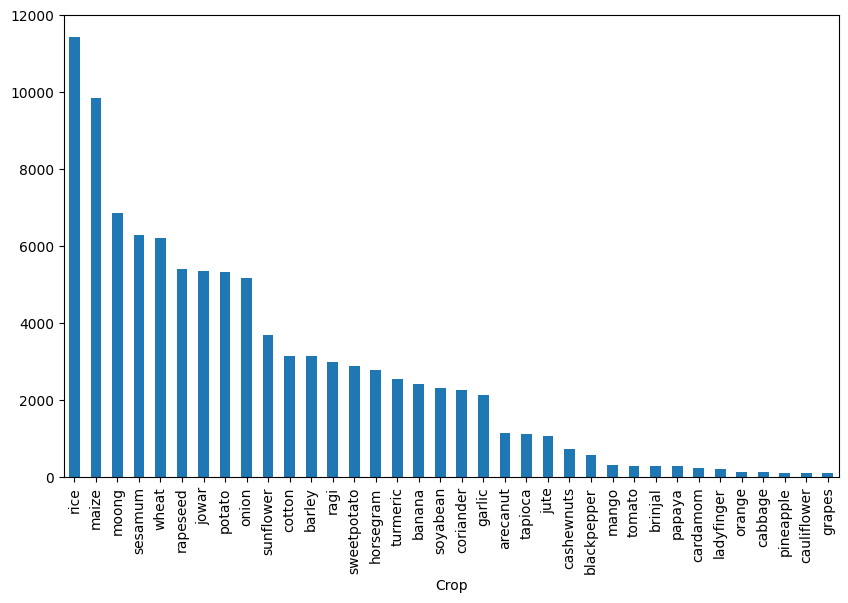

In [22]:
df['Crop'].value_counts().plot(kind="bar",figsize=(10,6))
df['Crop'].nunique()

### Performing one hot encoding on Categorical Columns

In [23]:
#Using one hot encoding on the "Season" column
df_dummy=pd.get_dummies(df["Season"],drop_first=True)
df=pd.concat([df,df_dummy],axis=1)

#### Removed Kharif Season

In [24]:
#Using one hot encoding on the "Season" column
df_dummy=pd.get_dummies(df["Crop"],drop_first=True)
df=pd.concat([df,df_dummy],axis=1)

#### Removed the Arecanaut crop

In [25]:
# Using one hot encoding on the "State" column
df_dummy=pd.get_dummies(df["State"],drop_first=True)
df=pd.concat([df,df_dummy],axis=1)

#### Removed Andaman and Nicobar Islands

In [26]:
df = df.drop(columns=["Season","Crop","State"])
df.sample(10)

pH  Rainfall  Temperature     Area  Production      Yield   rabi  \
27513  5.68    490.74    27.600000  14391.0     26486.0   1.840456   True   
85007  5.84     75.32    22.676000     20.0       235.0  11.750000   True   
43722  6.50   1111.68    28.648182     35.0         0.0   0.000000  False   
61175  5.64    556.20    28.545455   1685.0      4428.0   2.627893  False   
57302  6.90     87.20    23.106000  46606.0     39460.0   0.846672   True   
10777  5.66    579.75    34.010000  36370.0     31496.0   0.865988  False   
1165   5.60    840.46    33.583333    514.0       910.0   1.770428  False   
98257  5.66    297.66    29.566667    168.0       337.0   2.005952  False   
61776  5.40     98.94    25.574000   6301.0     17939.0   2.847008   True   
43773  5.34     73.47    23.562000     16.0        22.0   1.375000   True   

       summer  whole year  banana  ...  puducherry  punjab  rajasthan  sikkim  \
27513   False       False   False  ...       False   False      False   False   
85007   False       False   False  ...       False   False      False   False   
43722   False        True   False  ...       False   False      False   False   
61175   False        True   False  ...       False   False       True   False   
57302   False       False   False  ...       False   False      False   False   
10777   False       False   False  ...       False   False      False   False   
1165    False       False   False  ...       False   False      False   False   
98257   False       False   False  ...       False   False      False   False   
61776   False       False   False  ...       False   False      False   False   
43773   False       False   False  ...       False   False      False   False   

       tamil nadu  telangana  tripura  uttar pradesh  uttarakhand  west bengal  
27513       False      False    False          False        False        False  
85007       False      False    False           True        False        False  
43722       False      False    False          False        False        False  
61175       False      False    False          False        False        False  
57302       False      False    False          False        False        False  
10777       False      False    False           True        False        False  
1165        False      False    False          False        False        False  
98257        True      False    False          False        False        False  
61776       False       True    False          False        False        False  
43773       False      False    False          False        False        False  

[10 rows x 76 columns]

In [27]:
# Check for duplicate column names
duplicate_columns = df.columns[df.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)

Duplicate columns: Index([], dtype='object')


In [28]:
# Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Display the resulting dataframe to verify duplicates are removed
df.head()

pH  Rainfall  Temperature     Area  Production     Yield   rabi  summer  \
0  5.46    654.34    29.266667   7300.0      9400.0  1.287671  False   False   
1  6.18    654.34    29.266667   3300.0      1000.0  0.303030  False   False   
2  5.42    654.34    29.266667  10100.0     10200.0  1.009901  False   False   
3  5.62    654.34    29.266667   2800.0      4900.0  1.750000  False   False   
4  5.68    654.34    29.266667   1300.0       500.0  0.384615  False   False   

   whole year  banana  ...  puducherry  punjab  rajasthan  sikkim  tamil nadu  \
0       False   False  ...       False   False      False   False       False   
1       False   False  ...       False   False      False   False       False   
2       False   False  ...       False   False      False   False       False   
3       False   False  ...       False   False      False   False       False   
4       False   False  ...       False   False      False   False       False   

   telangana  tripura  uttar pradesh  uttarakhand  west bengal  
0      False    False          False        False        False  
1      False    False          False        False        False  
2      False    False          False        False        False  
3      False    False          False        False        False  
4      False    False          False        False        False  

[5 rows x 76 columns]

# Visualization and Dealing with of Numerical Data

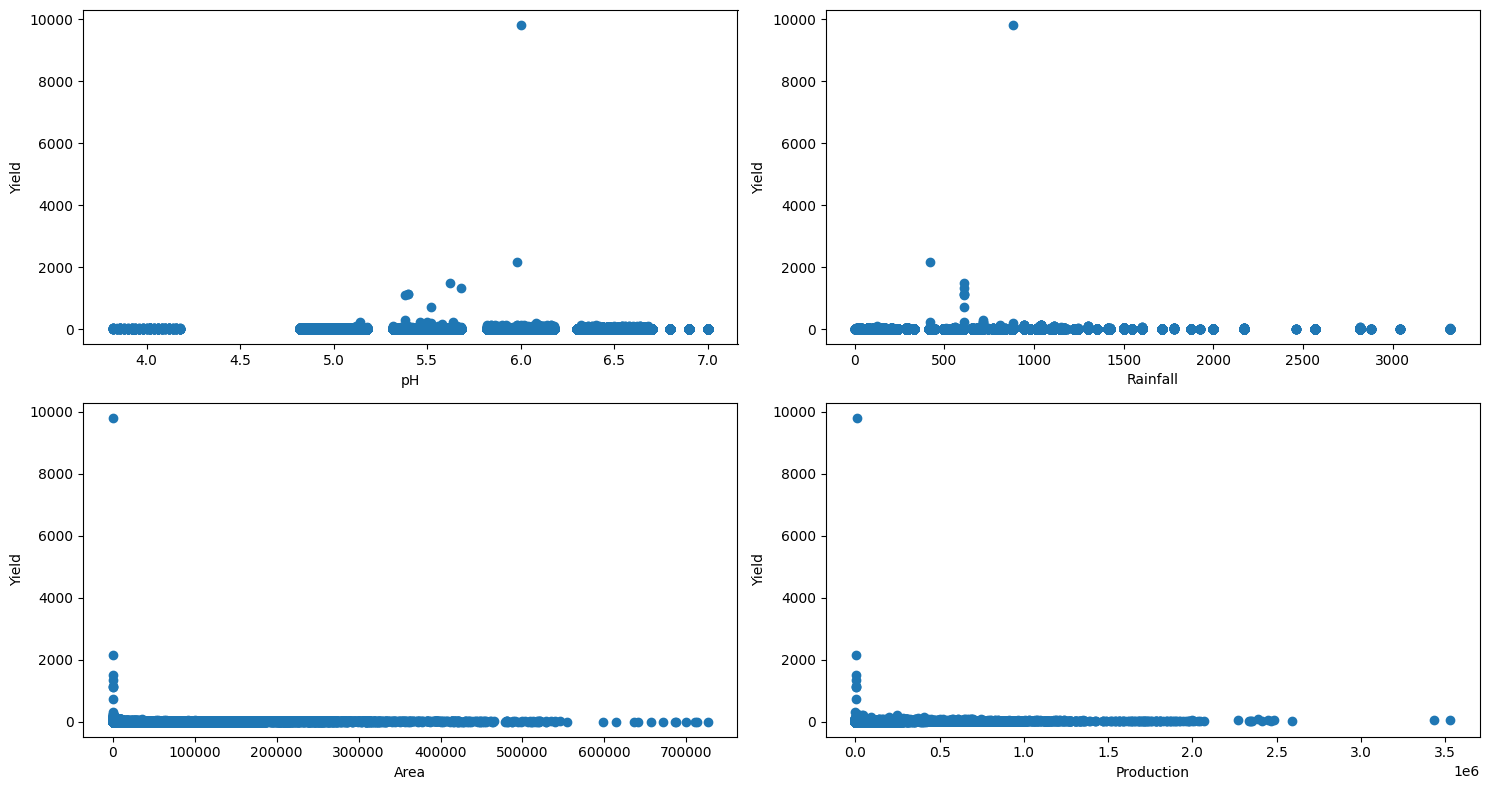

In [29]:
# Columns to plot
columns_to_plot = ['pH', 'Rainfall', 'Area', 'Production']

# Calculate number of rows and columns needed
num_rows = 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot each column against 'Yield'
for i, column in enumerate(columns_to_plot):
    axes[i].scatter(df[column], df['Yield'])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Yield')

# Remove empty subplots
for j in range(len(columns_to_plot), num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [30]:
df.shape

(99148, 76)

### Here we can see that some of these columns are skewed heavily so we will work on that

#### Limiting the Area column to 10,000 hectares and remove unimportant rows

In [31]:
df['Area'].describe()

count     99148.000000
mean      16587.743871
std       43736.781624
min           0.580000
25%         134.000000
50%        1035.000000
75%        8229.250000
max      726300.000000
Name: Area, dtype: float64

In [32]:
df['Area'].value_counts()

Area
2.0         617
5.0         593
3.0         579
1.0         578
4.0         560
           ... 
48017.0       1
81700.0       1
14824.0       1
118934.0      1
8774.0        1
Name: count, Length: 26335, dtype: int64

##### As we can see here the data for Area varies wildly and according to research usually the largest crop area that farmers can use in India is 5,000 hectares. So we will remove the area before that

In [33]:
df = df[df['Area'] <= 5000]
df.shape

(68960, 76)

In [34]:
pd.set_option('display.max_rows', None)
df['Area'].value_counts()

Area
2.00       617
5.00       593
3.00       579
1.00       578
4.00       560
10.00      521
6.00       490
7.00       447
8.00       437
20.00      418
15.00      417
9.00       412
100.00     397
12.00      386
11.00      373
14.00      342
30.00      338
16.00      333
13.00      333
17.00      330
25.00      318
18.00      309
200.00     304
19.00      275
23.00      273
40.00      272
21.00      269
50.00      265
300.00     262
22.00      255
26.00      246
27.00      229
29.00      225
28.00      222
400.00     220
24.00      216
60.00      216
80.00      207
500.00     202
33.00      202
45.00      201
31.00      200
34.00      195
42.00      191
35.00      190
32.00      188
39.00      187
1000.00    183
70.00      181
600.00     180
38.00      179
46.00      177
36.00      176
90.00      174
56.00      172
47.00      172
51.00      170
55.00      168
53.00      166
110.00     166
52.00      164
37.00      163
800.00     163
43.00      162
44.00      162
41.00      158
700.0

In [35]:
#Removing rows which have occurances less than 50
threshold = 50
count = df['Area'].value_counts()
crops_to_keep = count[count >= threshold].index
df = df[df['Area'].isin(crops_to_keep)]

In [36]:
df['Area'].describe()

count    34455.000000
mean       232.652358
std        583.060017
min          1.000000
25%         20.000000
50%         64.000000
75%        150.000000
max       5000.000000
Name: Area, dtype: float64

#### Performing log transformation on Production and Area column

In [37]:
# Apply logarithmic transformation (log base e)
df['Production'] = df['Production'].apply(lambda x: np.log(x) if x > 0 else 0)
df['Area'] = df['Area'].apply(lambda x: np.log(x) if x > 0 else 0)

### Histograms

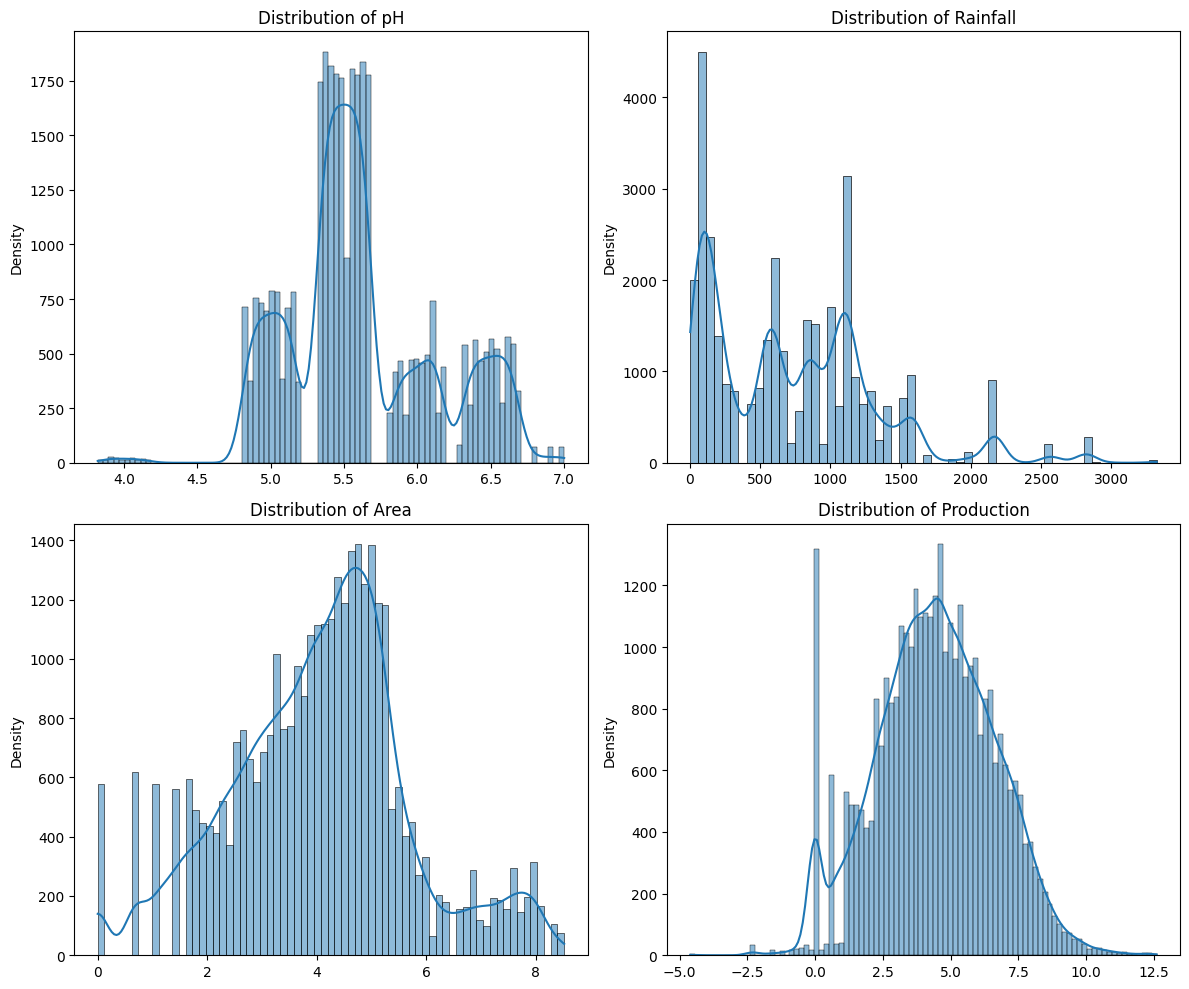

In [38]:
# Define the numeric columns
numeric_columns = ['pH', 'Rainfall', 'Area', 'Production']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot distplots for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


### Boxplots

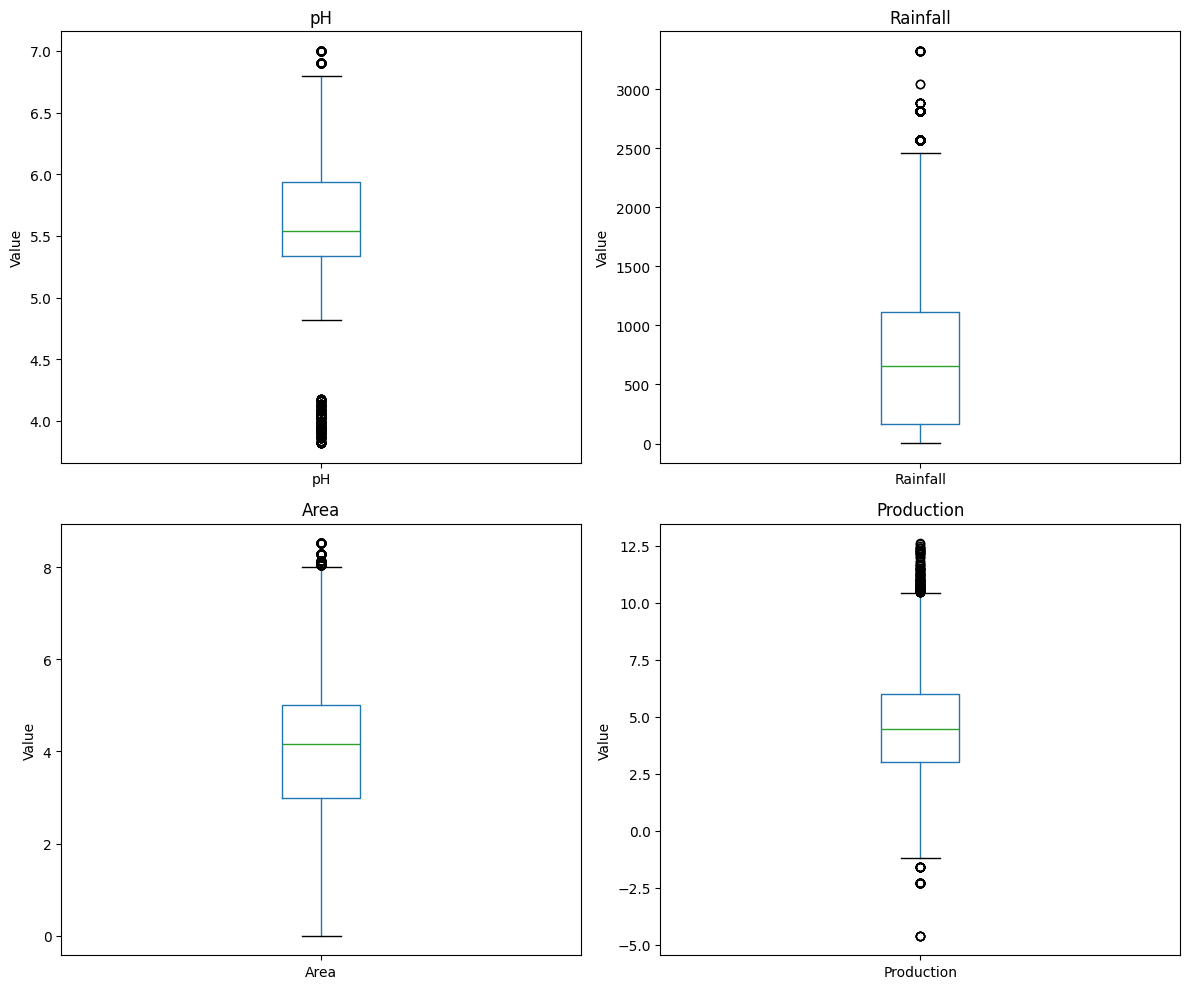

In [39]:
import matplotlib.pyplot as plt

# Numeric columns to plot
numeric_columns = ['pH', 'Rainfall', 'Area', 'Production']

# Calculate number of rows and columns needed
num_rows = 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot boxplots for each numeric column
for i, column in enumerate(numeric_columns):
    df.boxplot(column, ax=axes[i], grid=False)
    axes[i].set_title(column)
    axes[i].set_ylabel('Value')

# Remove empty subplots
for j in range(len(numeric_columns), num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### As we can see from the boxplots we have a lot of outliers so we will remove them

In [40]:
# Finding the IQR
num_cols=[]
for i in ['pH', 'Rainfall', 'Area', 'Production']:
    p25 = df[i].quantile(0.25)
    p75 = df[i].quantile(0.75)
    iqr = p75 - p25
    ulimit = p75 + 1.5 * iqr
    llimit = p25 - 1.5 * iqr
    df = df[df[i] < ulimit]
df.shape

(33360, 76)

In [41]:
p25=df['pH'].quantile(0.25)
p75=df['pH'].quantile(0.75)
iqr=p75-p25
llimit = p25 - 1.2 * iqr
df = df[df['pH'] > llimit ] 
df.shape

(33186, 76)

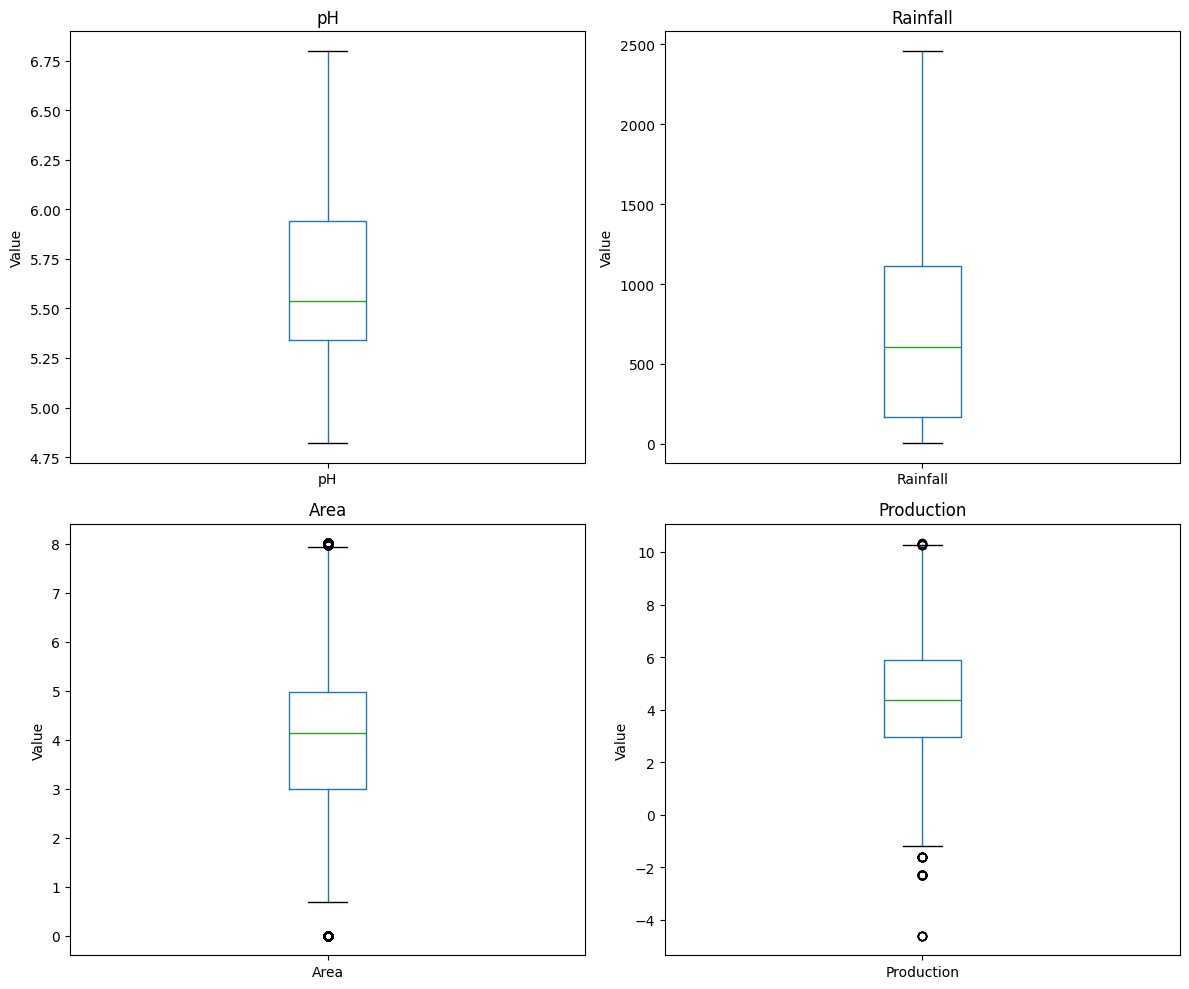

In [42]:
import matplotlib.pyplot as plt

# Numeric columns to plot
numeric_columns = ['pH', 'Rainfall', 'Area', 'Production']

# Calculate number of rows and columns needed
num_rows = 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot boxplots for each numeric column
for i, column in enumerate(numeric_columns):
    df.boxplot(column, ax=axes[i], grid=False)
    axes[i].set_title(column)
    axes[i].set_ylabel('Value')

# Remove empty subplots
for j in range(len(numeric_columns), num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


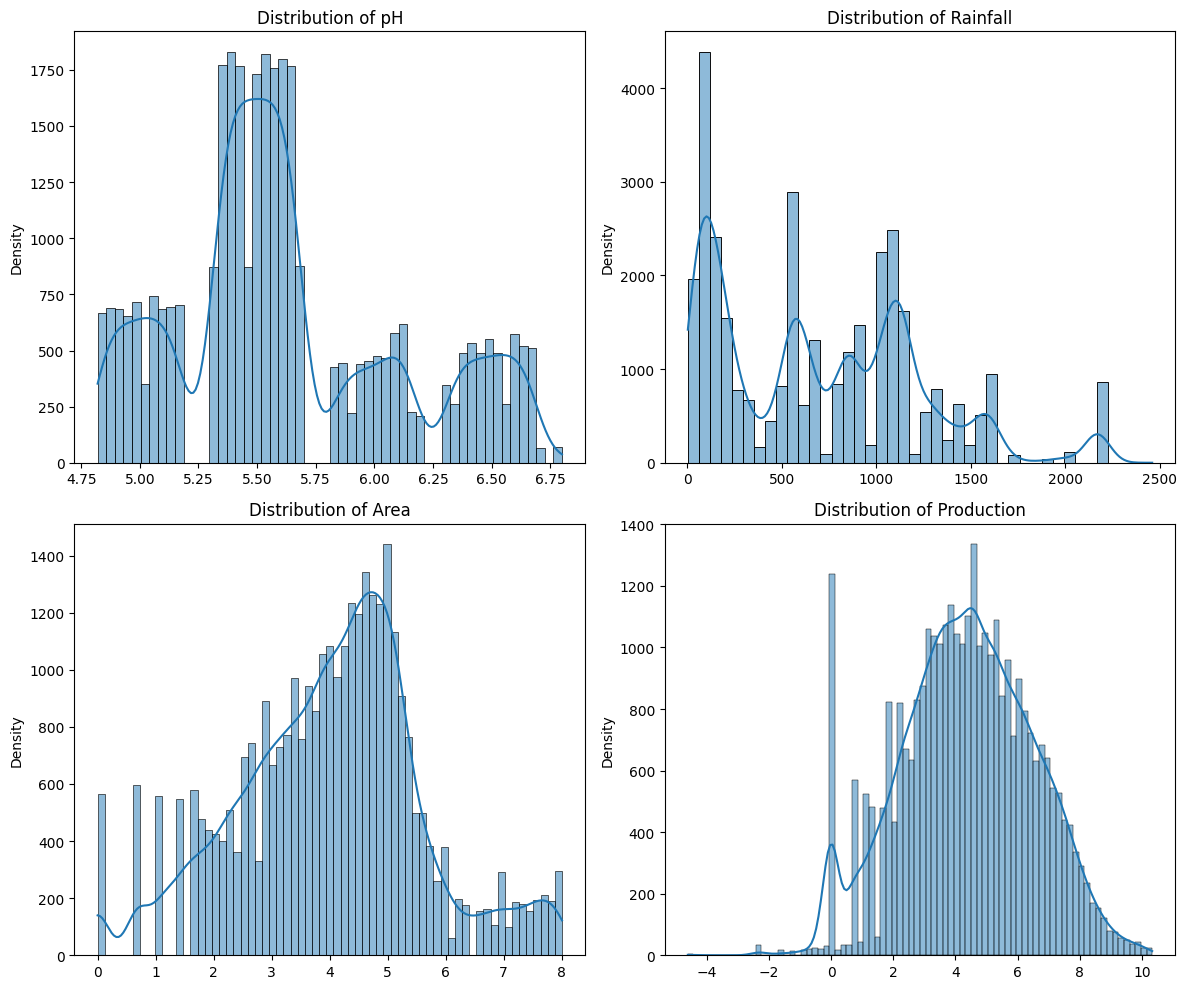

In [43]:
# Define the numeric columns
numeric_columns = ['pH', 'Rainfall', 'Area', 'Production']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot distplots for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


### Scatter plots for all numerical columns vs Yield

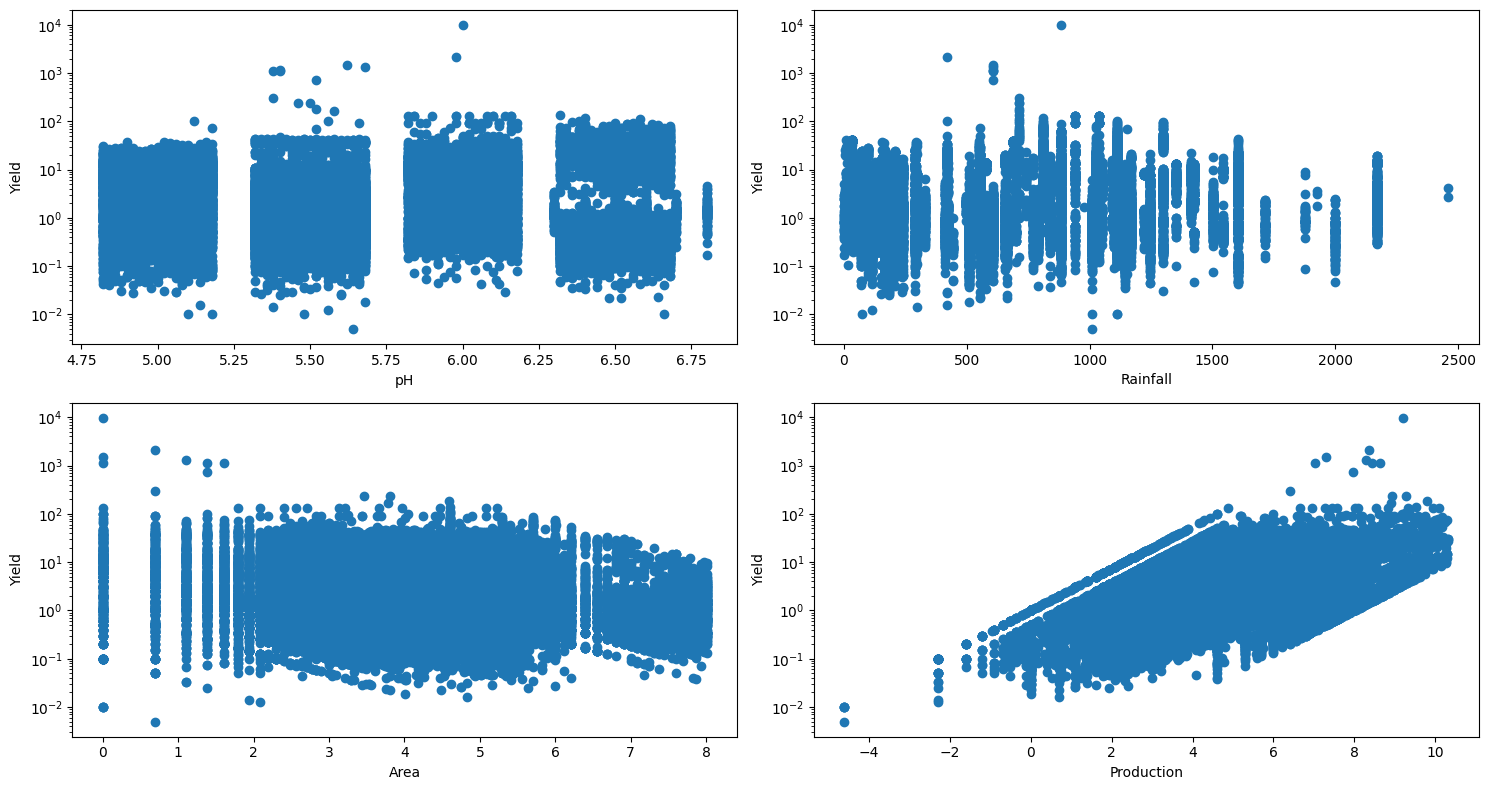

In [44]:
# Columns to plot
columns_to_plot = ['pH', 'Rainfall', 'Area', 'Production']

# Calculate number of rows and columns needed
num_rows = 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot each column against 'Yield' with log scale on y-axis
for i, column in enumerate(columns_to_plot):
    axes[i].scatter(df[column], df['Yield'])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Yield')
    axes[i].set_yscale('log')  # Set y-axis to log scale

# Remove empty subplots
for j in range(len(columns_to_plot), num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Pairplots between all numerical features

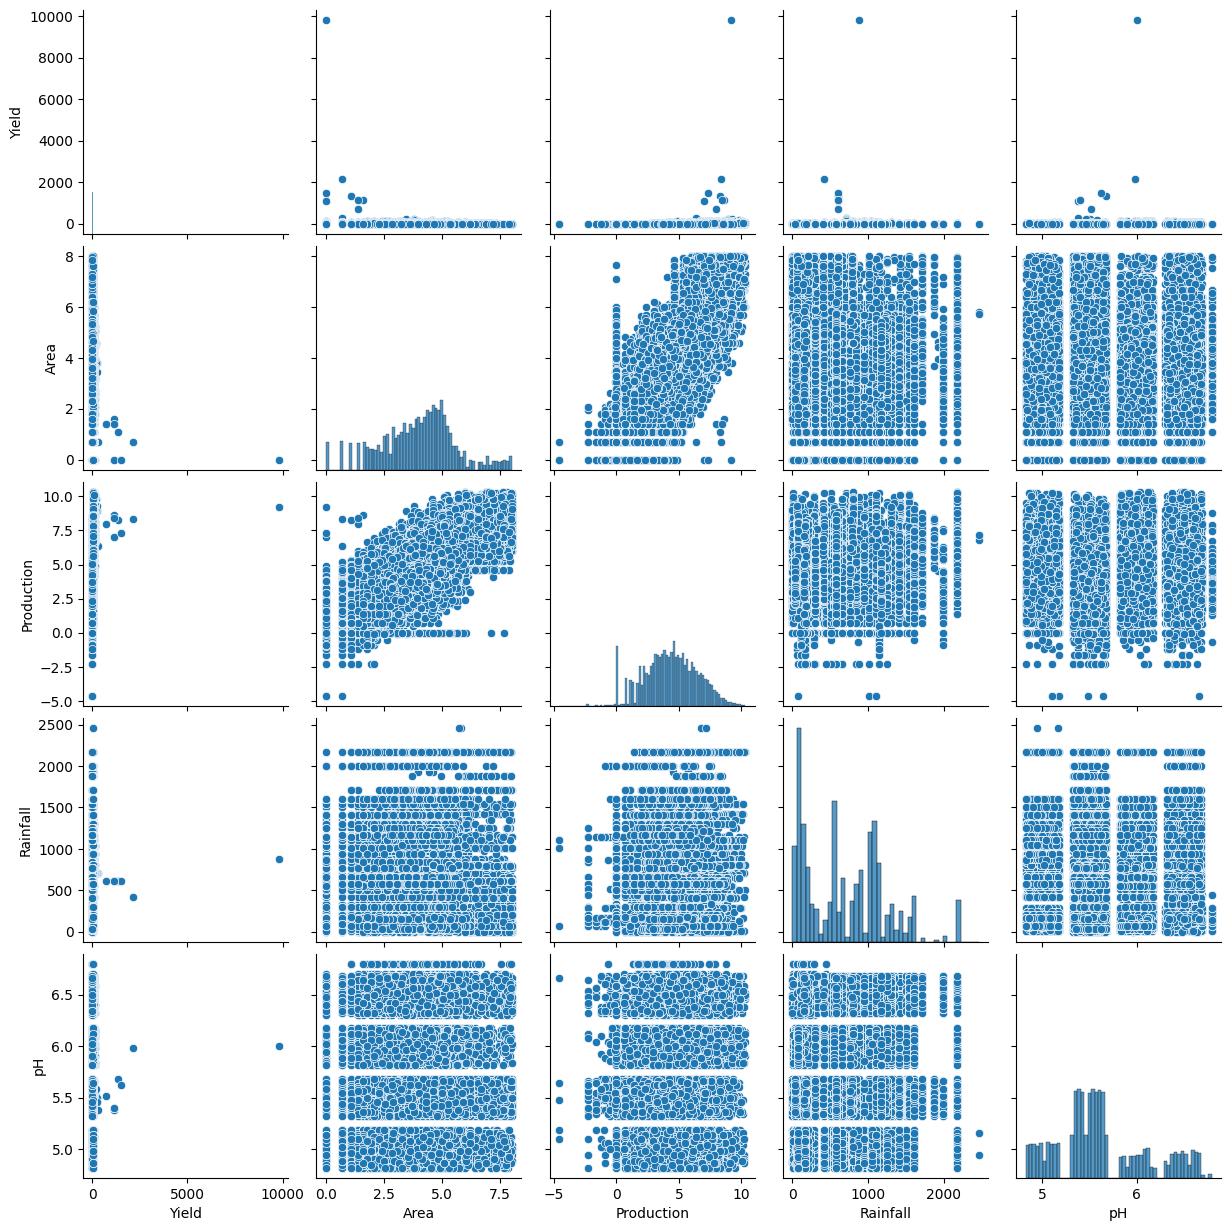

In [45]:
columns_to_plot = ['Yield', 'Area', 'Production', 'Rainfall', 'pH']
df_selected = df[columns_to_plot]

# Create the pairplot
sns.pairplot(df_selected)
plt.show()

### Heatmap showing correlation between each of the features

<Axes: >

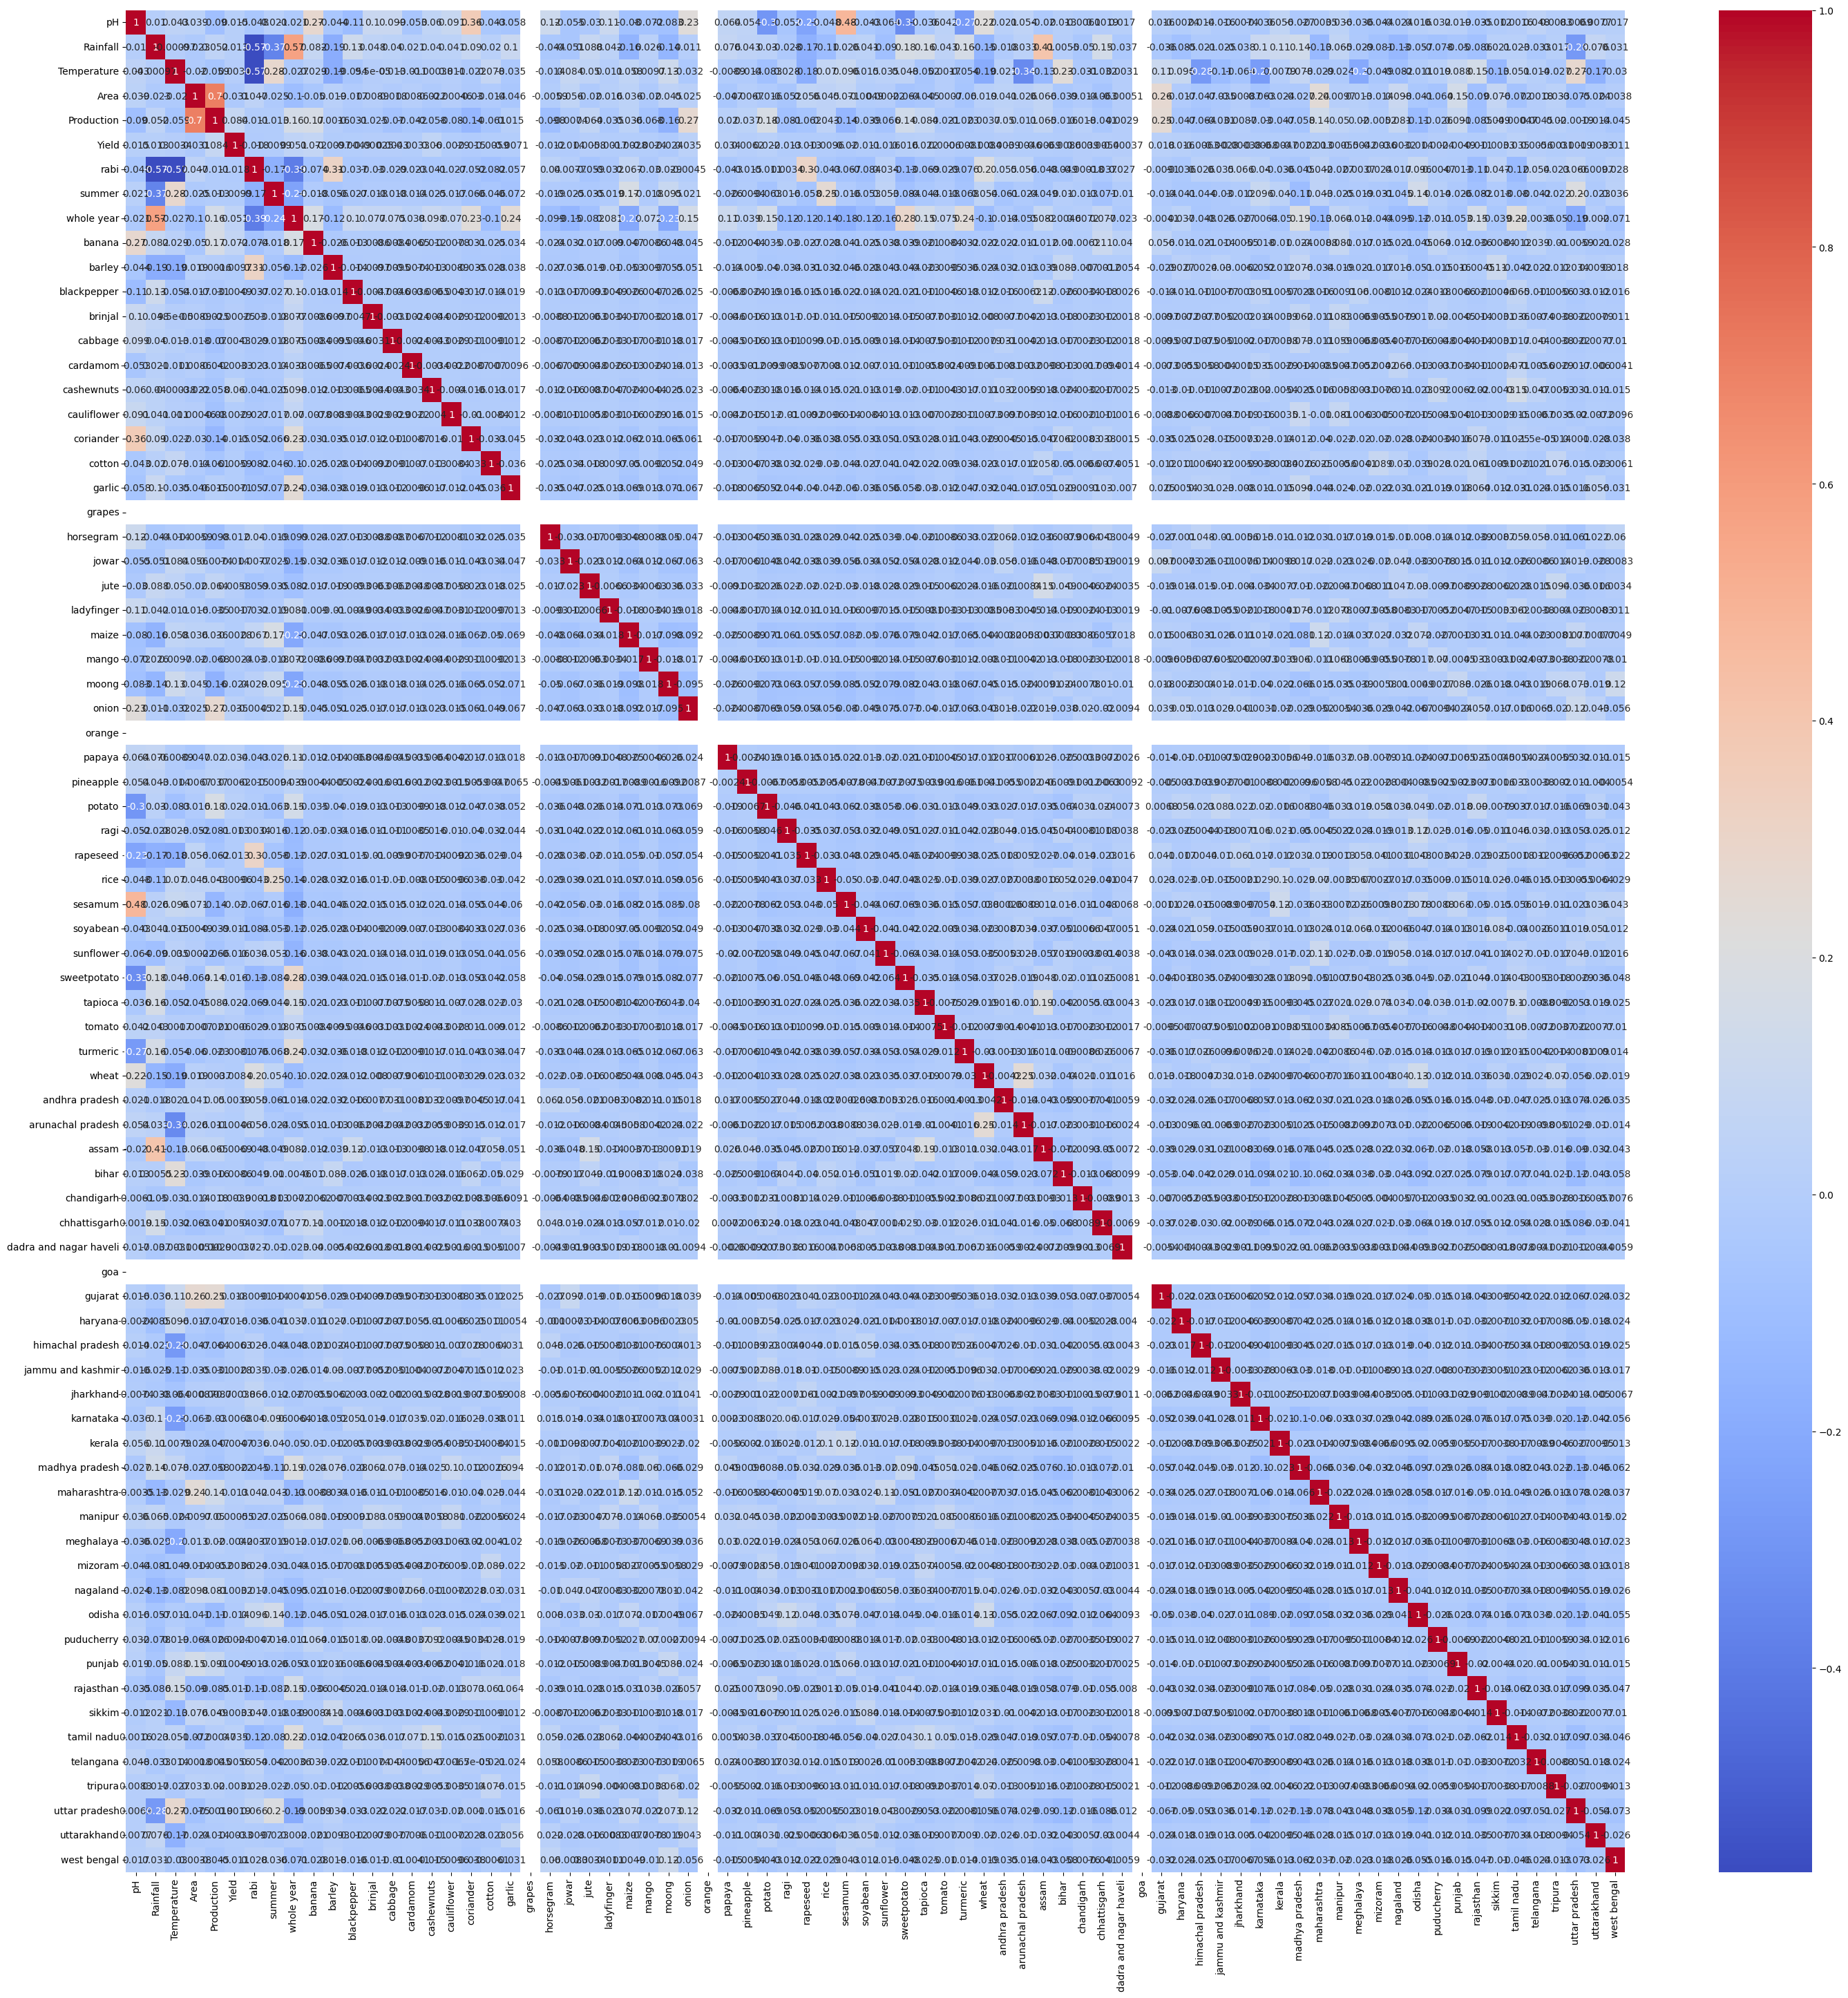

In [46]:
plt.figure(figsize=(35, 35))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Applying Various Models

In [47]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Yield'])
Y = df['Yield']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=2)

## Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [49]:
Y_pred=lr.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  6.581192190815561
MSE:  117.9336335606859
R2 Score:  -0.23035855975850072


## Ridge Regression

In [50]:
from sklearn.linear_model import Ridge 
r=Ridge(alpha=0.01)
r.fit(X_train,Y_train)

Ridge(alpha=0.01)

In [51]:
Y_pred=r.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  6.580936310840094
MSE:  117.92271069453595
R2 Score:  -0.2302446054821934


## Lasso Regression

In [52]:
from sklearn.linear_model import Lasso
L=Lasso(alpha=3.9)
L.fit(X_train,Y_train)

Lasso(alpha=3.9)

In [53]:
Y_pred=L.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  3.5246403259768013
MSE:  62.670524927954496
R2 Score:  0.3461812846630412


## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion="squared_error",max_depth=None)
dtr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [55]:
Y_pred=dtr.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  0.31307706920533296
MSE:  10.648945029962503
R2 Score:  0.8889034427717338


### Hyperparameter Tuning for DecisionTree

In [56]:
param_dist={
    "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "max_depth":[1,2,3,4,5,6,None]
}

In [57]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(dtr,param_grid=param_dist,cv=10,n_jobs=-1)

## Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=42)
rfr.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [59]:
Y_pred=rfr.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  0.27617547028253997
MSE:  13.737059656150628
R2 Score:  0.8566862698658313


## Adaboost

In [60]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(X_train,Y_train)

AdaBoostRegressor()

In [61]:
Y_pred=abr.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  4.330349206041458
MSE:  82.54893921840991
R2 Score:  0.13879704288012173


## KNNeighbours

In [62]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [63]:
Y_pred=knn.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  0.7095823428416693
MSE:  15.651158564191881
R2 Score:  0.8367171744972813


## XgBoost

In [65]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [66]:
Y_pred=xgb.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  0.9396331307425639
MSE:  946.6356048141528
R2 Score:  -8.875903795976319


### Hyperparameter Tuning for XGBoost

In [67]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)

In [68]:
xgb=XGBRegressor(colsample_bytree= 1.0, gamma= 0.1, learning_rate= 0.1, max_depth= 3, n_estimators= 300, subsample= 1.0)
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [69]:
Y_pred=xgb.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  0.6355653971964628
MSE:  13.292805439888584
R2 Score:  0.8613210119761516


In [70]:
df.shape

(33186, 76)

## LightGBM

In [72]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()

In [73]:
lgbm.fit(X_train,Y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 26548, number of used features: 72
[LightGBM] [Info] Start training from score 4.921826


LGBMRegressor()

In [74]:
Y_pred=lgbm.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  1.514161087389283
MSE:  84.79358963680504
R2 Score:  0.11537942423686309


## CatBoost

In [76]:
from catboost import CatBoostRegressor
cbr=CatBoostRegressor()

In [77]:
cbr.fit(X_train,Y_train)

Learning rate set to 0.068735
0:	learn: 63.6239345	total: 151ms	remaining: 2m 30s
1:	learn: 62.5632658	total: 154ms	remaining: 1m 17s
2:	learn: 61.6311390	total: 160ms	remaining: 53.1s
3:	learn: 60.7009332	total: 170ms	remaining: 42.2s
4:	learn: 59.8067769	total: 175ms	remaining: 34.8s
5:	learn: 58.7573755	total: 183ms	remaining: 30.3s
6:	learn: 57.7146410	total: 186ms	remaining: 26.4s
7:	learn: 56.7577586	total: 191ms	remaining: 23.7s
8:	learn: 55.8361139	total: 202ms	remaining: 22.2s
9:	learn: 55.0184944	total: 207ms	remaining: 20.5s
10:	learn: 54.0521340	total: 217ms	remaining: 19.5s
11:	learn: 53.2612786	total: 221ms	remaining: 18.2s
12:	learn: 52.4902241	total: 228ms	remaining: 17.3s
13:	learn: 51.7191138	total: 232ms	remaining: 16.3s
14:	learn: 50.8677808	total: 237ms	remaining: 15.5s
15:	learn: 49.9548584	total: 245ms	remaining: 15.1s
16:	learn: 49.2364253	total: 248ms	remaining: 14.4s
17:	learn: 48.3979368	total: 251ms	remaining: 13.7s
18:	learn: 47.5396590	total: 256ms	remaini

In [78]:
Y_pred=cbr.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  0.42191078387164
MSE:  5.389448136466548
R2 Score:  0.9437738544393786


### Hyperparameter tuning for Catboost

In [79]:
from sklearn.model_selection import GridSearchCV
# Define the parameter distribution
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'bagging_temperature': [0, 1, 2, 3],
    'border_count': [32, 50, 100]
}

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=cbr,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=3
)

In [80]:
cbr=CatBoostRegressor(learning_rate= 0.1,
                      l2_leaf_reg= 3,
                      iterations= 300,
                      depth= 8,
                      border_count= 50,
                      bagging_temperature= 0)

In [81]:
cbr.fit(X_train,Y_train)

0:	learn: 62.9272757	total: 15.5ms	remaining: 4.63s
1:	learn: 61.3224710	total: 29.7ms	remaining: 4.43s
2:	learn: 59.7621519	total: 34.7ms	remaining: 3.44s
3:	learn: 58.2268125	total: 40.3ms	remaining: 2.98s
4:	learn: 56.7394770	total: 48.6ms	remaining: 2.87s
5:	learn: 55.3222666	total: 54.8ms	remaining: 2.68s
6:	learn: 53.9481986	total: 63.7ms	remaining: 2.67s
7:	learn: 52.6223658	total: 69.9ms	remaining: 2.55s
8:	learn: 51.4146535	total: 75.4ms	remaining: 2.44s
9:	learn: 50.1241830	total: 86.6ms	remaining: 2.51s
10:	learn: 48.9425368	total: 95.8ms	remaining: 2.52s
11:	learn: 47.7121538	total: 103ms	remaining: 2.47s
12:	learn: 46.5119075	total: 114ms	remaining: 2.52s
13:	learn: 45.3413746	total: 128ms	remaining: 2.61s
14:	learn: 44.2149256	total: 132ms	remaining: 2.51s
15:	learn: 43.1543424	total: 143ms	remaining: 2.54s
16:	learn: 42.0902347	total: 148ms	remaining: 2.46s
17:	learn: 41.0364443	total: 157ms	remaining: 2.46s
18:	learn: 40.0183005	total: 161ms	remaining: 2.38s
19:	learn: 

In [82]:
Y_pred=cbr.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  0.729827480882282
MSE:  7.927180485365215
R2 Score:  0.9172986189736889


### Since not a single model is giving us the perfect result we will use a combination of multiple models to obtain the perfect model

# Voting Ensemble

In [83]:
from sklearn.ensemble import VotingRegressor
xbg=XGBRegressor()
cbr=CatBoostRegressor()
dtr=DecisionTreeRegressor()
ensemble = VotingRegressor(estimators=[('xgb', xgb),('cbr',cbr),('dtr',dtr)])

In [84]:
ensemble.fit(X_train,Y_train)

Learning rate set to 0.068735
0:	learn: 63.6239345	total: 2.91ms	remaining: 2.91s
1:	learn: 62.5632658	total: 6.13ms	remaining: 3.06s
2:	learn: 61.6311390	total: 9.72ms	remaining: 3.23s
3:	learn: 60.7009332	total: 16.3ms	remaining: 4.07s
4:	learn: 59.8067769	total: 19.1ms	remaining: 3.79s
5:	learn: 58.7573755	total: 21.9ms	remaining: 3.63s
6:	learn: 57.7146410	total: 27.2ms	remaining: 3.85s
7:	learn: 56.7577586	total: 31.3ms	remaining: 3.88s
8:	learn: 55.8361139	total: 34.6ms	remaining: 3.81s
9:	learn: 55.0184944	total: 37.3ms	remaining: 3.69s
10:	learn: 54.0521340	total: 40.7ms	remaining: 3.66s
11:	learn: 53.2612786	total: 46.7ms	remaining: 3.85s
12:	learn: 52.4902241	total: 49.7ms	remaining: 3.77s
13:	learn: 51.7191138	total: 52.9ms	remaining: 3.73s
14:	learn: 50.8677808	total: 56.3ms	remaining: 3.69s
15:	learn: 49.9548584	total: 62.1ms	remaining: 3.82s
16:	learn: 49.2364253	total: 65.4ms	remaining: 3.78s
17:	learn: 48.3979368	total: 68.4ms	remaining: 3.73s
18:	learn: 47.5396590	tota

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=1.0, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=0.1,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints...
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None, ...)),
                            ('cbr',
                             <catboost.core.CatBoostRegressor object at 0x000002245F709D10>),
                            ('dtr', DecisionTreeRegressor())])

In [85]:
Y_pred=ensemble.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  0.317675862277403
MSE:  2.1512233229976223
R2 Score:  0.9775570721473592


#### Hence we have obtained our model as the Voting Regressor combination of XGBoost, CatBoost and Decision Tree

# Model Evaluation

In [86]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Training performance
Y_train_pred = ensemble.predict(X_train)
train_r2 = r2_score(Y_train, Y_train_pred)
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)

print(f"Training R2: {train_r2}")
print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")

# Test performance
Y_test_pred = ensemble.predict(X_test)
test_r2 = r2_score(Y_test, Y_test_pred)
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)

print(f"Test R2: {test_r2}")
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")


Training R2: 0.9999487248939759
Training MAE: 0.20737326586929078
Training MSE: 0.21391647869147679
Test R2: 0.9775570721473592
Test MAE: 0.317675862277403
Test MSE: 2.1512233229976223


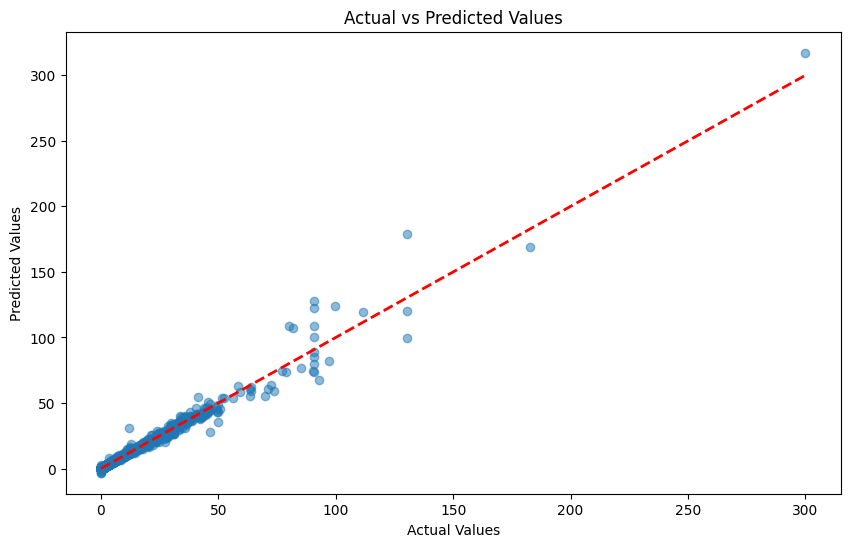

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## Taking inputs 

In [88]:
pd.set_option('display.max_columns', None)
df.head()

pH  Rainfall  Temperature      Area  Production     Yield   rabi  \
3   5.62    654.34    29.266667  7.937375    8.496990  1.750000  False   
4   5.68    654.34    29.266667  7.170120    6.214608  0.384615  False   
8   6.00    288.30    25.460000  6.396930    5.298317  0.333333   True   
10  5.54    288.30    25.460000  6.396930    7.783224  4.000000   True   
11  5.60    288.30    25.460000  6.396930    6.907755  1.666667   True   

    summer  whole year  banana  barley  blackpepper  brinjal  cabbage  \
3    False       False   False   False        False    False    False   
4    False       False   False   False        False    False    False   
8    False       False   False   False        False    False    False   
10   False       False   False   False        False    False    False   
11   False       False   False   False        False    False    False   

    cardamom  cashewnuts  cauliflower  coriander  cotton  garlic  grapes  \
3      False       False        False      False   False   False   False   
4      False       False        False      False   False   False   False   
8      False       False        False      False   False   False   False   
10     False       False        False      False   False   False   False   
11     False       False        False      False   False   False   False   

    horsegram  jowar   jute  ladyfinger  maize  mango  moong  onion  orange  \
3       False  False  False       False   True  False  False  False   False   
4       False  False  False       False  False  False   True  False   False   
8        True  False  False       False  False  False  False  False   False   
10      False  False  False       False   True  False  False  False   False   
11      False  False  False       False  False  False  False  False   False   

    papaya  pineapple  potato   ragi  rapeseed   rice  sesamum  soyabean  \
3    False      False   False  False     False  False    False     False   
4    False      False   False  False     False  False    False     False   
8    False      False   False  False     False  False    False     False   
10   False      False   False  False     False  False    False     False   
11   False      False   False   True     False  False    False     False   

    sunflower  sweetpotato  tapioca  tomato  turmeric  wheat  andhra pradesh  \
3       False        False    False   False     False  False            True   
4       False        False    False   False     False  False            True   
8       False        False    False   False     False  False            True   
10      False        False    False   False     False  False            True   
11      False        False    False   False     False  False            True   

    arunachal pradesh  assam  bihar  chandigarh  chhattisgarh  \
3               False  False  False       False         False   
4               False  False  False       False         False   
8               False  False  False       False         False   
10              False  False  False       False         False   
11              False  False  False       False         False   

    dadra and nagar haveli    goa  gujarat  haryana  himachal pradesh  \
3                    False  False    False    False             False   
4                    False  False    False    False             False   
8                    False  False    False    False             False   
10                   False  False    False    False             False   
11                   False  False    False    False             False   

    jammu and kashmir  jharkhand  karnataka  kerala  madhya pradesh  \
3               False      False      False   False           False   
4               False      False      False   False           False   
8               False      False      False   False           False   
10              False      False      False   False           False   
11              False      False      False   False           False

In [89]:
import numpy as np

# Define the options for each category
states = ['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 
          'Dadra and Nagar Haveli', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 
          'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 
          'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 
          'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 
          'Uttarakhand', 'West Bengal']

crops = ['Arecanut', 'Barley', 'Banana', 'Blackpepper', 'Brinjal', 'Cabbage', 'Cardamom', 'Cashewnuts', 'Cauliflower', 
         'Coriander', 'Cotton', 'Garlic', 'Grapes', 'Horsegram', 'Jowar', 'Jute', 'Ladyfinger', 'Maize', 
         'Mango', 'Moong', 'Onion', 'Orange', 'Papaya', 'Pineapple', 'Potato', 'Rapeseed', 'Ragi', 'Rice', 
         'Sesamum', 'Soyabean', 'Sunflower', 'Sweetpotato', 'Tapioca', 'Tomato', 'Turmeric', 'Wheat']

seasons = ['Kharif', 'Rabi', 'Summer', 'Whole Year']

# Example inputs (in a real scenario, these would come from user input in the notebook)
state = 'Andaman and Nicobar Islands'
crop = 'Arecanut'
season = 'Kharif'
pH = 0
rainfall = 0
temperature = 0
area = 0
production = 0

# Preprocess input
state_lower = state.lower()
crop_lower = crop.lower()
season_lower = season.lower()

state_encoded = [0] * (len(states) - 1) if state_lower == 'andaman and nicobar islands' else [1 if s.lower() == state_lower else 0 for s in states if s.lower() != 'andaman and nicobar islands']
crop_encoded = [0] * (len(crops) - 1) if crop_lower == 'arecanut' else [1 if c.lower() == crop_lower else 0 for c in crops if c.lower() != 'arecanut']
season_encoded = [0] * (len(seasons) - 1) if season_lower == 'kharif' else [1 if s.lower() == season_lower else 0 for s in seasons if s.lower() != 'kharif']

input_features = np.array(state_encoded + crop_encoded + season_encoded + [pH, rainfall, temperature, area, production]).reshape(1, -1)

# Ensure the input_features array has the correct shape
expected_num_features = len(states) + len(crops) + len(seasons) - 3 + 5  # Exclude the dropped categories and include additional fields
if input_features.shape[1] != expected_num_features:
    print(f"Feature shape mismatch, expected: {expected_num_features}, got: {input_features.shape[1]}")
else:
    # The input_features is now ready to be used for prediction
    print("Input features shape:", input_features.shape)
    print("Input features:", input_features)

# For prediction, you would use the loaded model
predicted_yield = ensemble.predict(input_features)
print(f'The predicted yield for the selected inputs is: {predicted_yield[0]:.2f} tons/hectare')


Input features shape: (1, 75)
Input features: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]]
The predicted yield for the selected inputs is: 1.21 tons/hectare


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [90]:
# Inspect individual models in a VotingRegressor
for idx, est in enumerate(ensemble.estimators_):
    print(f"Estimator {idx + 1}: {est}")
    if hasattr(est, 'intercept_'):
        print(f"  Intercept: {est.intercept_}")
    if hasattr(est, 'feature_importances_'):
        print(f"  Feature importances: {est.feature_importances_}")


Estimator 1: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)
  Intercept: [4.921826]
  Feature importances: [2.62278728e-02 4.19641176e-04 2.19321717e-03 8.36113989e-01
 6.44192472e-02 1.75390051e-05 0.00000000e+00 3.76928272e-03
 9.73004475e-03 0.00000000e+00 0.00000000e+00 1.41681849e-05
 1.70039537e-0

## Saving the model

In [91]:
import joblib
from joblib import dump
# File path where you want to save the .sav file
save_path = 'voting_yield.sav'

# Save the ensemble to .sav file
dump(ensemble, save_path)

['voting_yield.sav']

In [92]:
import pickle 
with open('ensemble.pkl', 'wb') as file:
    pickle.dump(ensemble, file)